# Data cleaning

## Introduction

The goal of this project was to build a model that could predict something of clear business or user value. I chose to have data of my own; my Whatsapp messages of a group chat of my long time friends from home, called "GB's". The group chat was originally created on 23th of January 2013, but I could only recieve messages from the **10th of May, 2014**. We are with **11 guys** in the chat. Since everybody switched phones over the years and didn't transport all their data. But that was of no problem since we have the last **397731 messages** of the chat. 

We not only send messages in the chat to meet up, but also discuss a lot about football, news, politics, showbiz and some more football. I expect to see a peak at Tuesday evenings, Wednesday evenings and Sunday afternoons, since that's when the biggest football matches are played. With all this data, I wanted to know how predictive we have become over the years. Could you already know who is going to send the next message? So:

**Who would be most likely to send the next message on the basis of the messages that came before?**

This notebook will take you through the data cleaning, feature engineering, data analysis, predictive modeling, and analysis parts.

_**<font color='red'>UPDATE</font>**_

_**<font color='red'>Due to privacy reasons some of the outputs of the cells are cleared</font>**_

_**<font color='red'>Some graphs didn't show up anymore, but the analysis is still there. I'll see if I can fix it later.</font>**_

## Part I: Data Set & Data Cleaning
First we need to delete all the flaws out of the dataframe. I downloaded the data of the phone of Faried, my friend who had a longer message history. 

I only recieved raw lines of message dates with the message. They weren't structured nicely into columns and you didn't have an oversight if the message contained for exapmple an image or audio. You also can't see if somebody responded directly to an earlier send message. That was kind of a bummer. There were also some issues I struggled with:

- There was an weird symbol, "‚Äé", before every non-message row (like when someone sent an image). I could see this only when I opened the .csv in Excel.
- There are a lot of empty cells these were /n's in the messages that the system didn't see as the same message.
- When there was text after an \n in the message, it was presented as a new row that didn't start with a timecode.

In [233]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import emoji
from collections import Counter

In [ ]:
# importing the data. With encoding 'utf-8' we are able to see the "‚Äé" symbol that is shown as '\u200e' after.
df = pd.read_csv('chat2.0.csv', sep=" ", names=['data'], encoding='utf-8')
df.head()

_**<font color='red'>Data cleared</font>**_

To merge the messages with **\n's** with the original message it belongs to, I first dropped all the empty cells because they were not necessary anyway. After that I placed every message after each other so that it becomes one big string. This way the text that was send after the **\n's** was right after the original message **with** a timecode. After that I splitted the string on every **' ['** because that is how every message started in the string.

In [ ]:
# drop all the empty cells in the DF
df = df.dropna()

# delete the 'AE'-symbol
df['data'] = df['data'].str.replace('\u200e', '')

# make everything a string because it gave an error that not everything was en therefor it couldn't .join() everything together
df = df.applymap(str)

# make one big string of everything. This way messages with enters are merged together. I lowered all the characters in the messages.
# also splitting the big string right away on ' [' to create one big list. If I'd do this sepperately it didn't work.
df = " ".join(msg for msg in df.data.str.lower()).split(' [')

# creating a Dataframe out of the list of messages and giving it the column name 'data'
df = pd.DataFrame(df, columns=['data'])

df.head()

_**<font color='red'>Data cleared</font>**_

#### Splitting data and creating better variables

Now we luckily have a dataset withouth the issues in the beginning. What we now need are the variables that are already in each row. We're also doing this with the **.split** function.
- Date
- Time
- Name of sender
- Messages

In [ ]:
# Split the data in half on the '] '
df[['date_time', 'name_text']] = df['data'].str.split('] ', 1, expand=True)

df.head()

_**<font color='red'>Data cleared</font>**_


This gives us 2 columns:
- [29-01-2013 23:46:29
- Abel: Best stil vandaag

Split the second in half again, so we seperate the name of the sender from the message. We split it on ': '. It ish identical in the column, so we split it only once. That way it can't go wrong. And let's clean the dataset a big right away.

In [ ]:
# split the data to the columns name and text
df[['name', 'text']] = df['name_text'].str.split(': ', 1, expand=True)

# The splitting only duplicated the columns into new ones. Here we subset the dataframe with only the columns we need.
df = df[['date_time', 'name', 'text']]

# deleting the [ in the first row
df['date_time'] = df['date_time'].str.replace('[', '')

# Deleting all none-text messages. These are group actions (e.g. Adding people to the group, changing group name, etc.)
df = df.dropna(subset=['text'])

df.head()

_**<font color='red'>Data cleared</font>**_


It already looks pretty good. But there's still some trouble with the names as you can see. Let's look at this more thorough.

In [ ]:
# Showing all the unique values of the column "name"
df.name.unique()

_**<font color='red'>Data cleared</font>**_


In [ ]:
# counting the different names. 
df['name'].value_counts().head(20)

_**<font color='red'>Data cleared</font>**_



We see a lot of people in the dataset. There are only 11 guys in the group chat. Why is this?
- Some people have had different phone numbers over the years. These are noticed by (oud) after the name or as just a number.
- Some people are not in the chat anymore.
- There are a lot of "group actions" that happened over the years. These are messages when (i.e.) someone is added to the group, deleted from the group or someone changed the group chat name. These messages are not structured like normal messages. Because we splitted the data on the ": ", the "group action" messages are beeing seen as names. They don't contain ": " in the message.

The "group action" messages are dropped later, since I don't see them have have much influence on the one who'll respond on normal messages. Now we can just focus on them.

In [ ]:
# To have 11 unique values, change some values with the replace function.
# The phone numbers look a little bit different, the system recognizes them different.
# I found out about this with the function: df['name'].unique_values()
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Faried')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Mel')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Abel')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Samson')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Max')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Justin')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Daan')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Jules')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Ramzy')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Rutger')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Jules')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Abel')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Nicko')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Nicko')
df['name'] = df['name'].replace(['**DATA CLEARED**'],'Rutger')

# We only need the names of the "guys" who are in the chat today, because only they are still relevant.
df = df.loc[(df['name'] == 'Faried') | (df['name'] == 'Mel') | (df['name'] == 'Abel') | (df['name'] == 'Samson') | (df['name'] == 'Max') | (df['name'] == 'Justin') | (df['name'] == 'Daan') | (df['name'] == 'Jules') | (df['name'] == 'Ramzy') | (df['name'] == 'Rutger') | (df['name'] == 'Nicko')]

# Lets reset the index to have a more structured dataframe.
df = df.reset_index()

df

_**<font color='red'>Data cleared</font>**_



It already looks way better! We can also see some emoticons (which I will call emojis) there, let's extract them from the dataframe and add them to a new column.

*In the end stages running the code took a while on a laptop. So I switched to a (Windows) pc, but Windows didn't run the next piece of code. I had to download an extra package and didn't had space (wasn't my pc). So the next part I could only do on my MacBook. That's the reason I work from another .csv-file after.*

In [241]:
# What I do here is extracting al emojis in a list.
# The extracted list gives a dictionary with all kinds of information.
# The first column is a list of the extracted emojis of each row 
# Then make it a pandas Series so we can add it to the df later.

# import advertools as adv

# t_emo = adv.extract_emoji(df['text'])
# t_emo = t_emo.pop('emoji')
# t_emo = pd.Series(t_emo, name='emojis')
# df = pd.concat([df, t_emo], axis=1)

# importing the new data. add converters so it sees the "emojis" columns as lists
df = pd.read_csv('chat-emoji.csv', encoding='utf-8', converters={'emojis': eval})
df.head()

,date_time,name,text,emojis
0,10-05-2014 19:36:39,Faried,zemmeks,[]
1,10-05-2014 19:36:41,Faried,jajaja,[]
2,10-05-2014 19:36:45,Faried,nieuwe iphone,[]
3,10-05-2014 19:36:48,Faried,zonder barst,[]
4,10-05-2014 21:55:52,Justin,gaan mensen nog aus,[]


We finally need one more thing, the Y variable. This is the thing that we want to predict. It's the name value of the row after/below the current row. We can easily grap it with the *.shift* function.

In [ ]:
df['responder'] = df['name'].shift(-1)

df

_**<font color='red'>Data cleared</font>**_



In [243]:
df['name'].value_counts()

Faried    99597
Mel       79305
Abel      61406
Samson    47096
Max       23827
Justin    18335
Daan      16127
Jules     16006
Ramzy     12987
Rutger    11601
Nicko      2083
Name: name, dtype: int64

So this looks already pretty good from the data we got from Whatsapp. I we finally have **388370 messages** of **11 people** in **6,5 years**

## Part II: Feature engineering

Whatsapp gave us very little variables we could clean. So I had to come up with new variables that could have an impact on the results. We will add them one by one.

#### Content variables
First lets evaluate the text in the message. What kind of message is it? And how long is the message?

We want to know:
- How many characters does the message contain?
- How many words does the message contain?
- Does the message contain a link?
- Does the message contain an image?
- Does the message contain an audio file?

In [244]:
df['words'] = df['text'].str.split().str.len().fillna(0).astype(int)
df['characters'] = df['text'].str.len().fillna(0).astype(int)
df['link'] = df['text'].str.contains('https://|http://|www.').fillna(0).astype(int)
df['img'] = df['text'].str.contains("afbeelding weggelaten").fillna(0).astype(int)
df['audio'] = df['text'].str.contains("audio weggelaten").fillna(0).astype(int)

df.head()

,date_time,name,text,emojis,responder,words,characters,link,img,audio
0,10-05-2014 19:36:39,Faried,zemmeks,[],Faried,1,7,0,0,0
1,10-05-2014 19:36:41,Faried,jajaja,[],Faried,1,6,0,0,0
2,10-05-2014 19:36:45,Faried,nieuwe iphone,[],Faried,2,13,0,0,0
3,10-05-2014 19:36:48,Faried,zonder barst,[],Justin,2,12,0,0,0
4,10-05-2014 21:55:52,Justin,gaan mensen nog aus,[],Daan,4,19,0,0,0


#### Adding time

The first variables we're going to create are the time variables. The different dates on itself don't have much value, so we need to categorize them.

What we do want is:
- Day
- Period of day
- Season

In [245]:
# First we need to tell the system how our date/time is formatted
df['date_time'] = pd.to_datetime(df.date_time, format='%d-%m-%Y %H:%M:%S', errors='coerce')

# With this function we can find out which day of the week a certain date is
df['day'] = df['date_time'].dt.strftime('%A')

# Now we're deciding the period of the day based on the hour. We give it a number to the 6 periods. The formula is: (hour + 4) / 4
# because of we create 6 periods we can be more specific on the time of the day.
# we add the +4 to the hour so that we can give 00:00h the value 1 (instead of 0) and 23:00h the value 6 (instead of 5)
# otherwise the formula wouldn't be evenly divided.
df['period'] = (df['date_time'].dt.hour % 24 + 4) // 4  # https://stackoverflow.com/questions/55571311/get-part-of-day-morning-afternoon-evening-night-in-python-dataframe
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

# We do the same for the seasons. There are 4 seasons so we need to divide the months by 3 (12/3=4)
# Unlike the hours, the months start with 1 instead of 0. This is okay, because winter starts in December and ends in February (12, 1, 2)
df['season'] = (df['date_time'].dt.month + 3) // 3
df['season'].replace({1: 'Winter',
                      2: 'Spring',
                      3: 'Summer',
                      4: 'Fall',
                      5: 'Winter'}, inplace=True)

df.head()

,date_time,name,text,emojis,responder,words,characters,link,img,audio,day,period,season
0,2014-05-10 19:36:39,Faried,zemmeks,[],Faried,1,7,0,0,0,Saturday,Evening,Spring
1,2014-05-10 19:36:41,Faried,jajaja,[],Faried,1,6,0,0,0,Saturday,Evening,Spring
2,2014-05-10 19:36:45,Faried,nieuwe iphone,[],Faried,2,13,0,0,0,Saturday,Evening,Spring
3,2014-05-10 19:36:48,Faried,zonder barst,[],Justin,2,12,0,0,0,Saturday,Evening,Spring
4,2014-05-10 21:55:52,Justin,gaan mensen nog aus,[],Daan,4,19,0,0,0,Saturday,Night,Spring


#### Who are in the conversation?
It is more likely that somebody who already sent a message, will respond. For example: 

*Person A: Hey how are you guys doing?*

*Person B: Great how are you?*

*Person A: Doing great!*

I experimented with different amounts. The higher I went, the higher the prediction percentage went from people with more messages, but people with less messages got a lower percentage. To have a good balance I finally concluded that to look at the 10 messages before would be most benificial.

In [246]:
df['before_1mes'] = df['name'].shift(1)
df['before_2mes'] = df['name'].shift(2)
df['before_3mes'] = df['name'].shift(3)
df['before_4mes'] = df['name'].shift(4)
df['before_5mes'] = df['name'].shift(5)
df['before_6mes'] = df['name'].shift(6)
df['before_7mes'] = df['name'].shift(7)
df['before_8mes'] = df['name'].shift(8)
df['before_9mes'] = df['name'].shift(9)
df['before_10mes'] = df['name'].shift(10)

A comment here that could be made is: 10 messages before a certain message won't always be the same conversation. It could be hours before, or even the day before. But in my own experience, when there are conversations in the chat, they are more than 10 messages and the conversation goes on and on. That's probably why the precision went up when we added more people. But, to be more secure I wanted to get all the people of * 15 minutes * before. I tried that with the folowwing code, but I struggled to get it to work. Maybe if I go  back to this later!

In [247]:
# from datetime import datetime

# df.reset_index()
# prec_row_num = df['index']
# output =  [False for cnt in len(df['name'])] 
# time_of_interest_minutes = 15

# while prec_row_num > 0:
#    prec_row_num = prec_row_num-1
#    dtime = datetime.strptime(msg_list[prec_row_num, date_time], '%m-%d-%Y %H:%M:%S') - datetime.strptime(msg_list[row_mum, date_time], '%m-%d-%Y %H:%M:%S')
#    if dtime.seconds//60 < time_of_interest_minutes:
#       output[name_list.index(msg_list[prec_row_num,name])] = True
#    else:
#       break

#### How many emojis are in the text?

We can add how many emojis there are in the text. Some people seemed to respond more to emojis than others. We can easily count the amount of list items in the "emojis" column.

In [248]:
df['emoji_count'] = df['emojis'].str.len()

#### Sentiment
After a lot of searching and trying I got a Dutch sentiment analyzer. The first number is the polarity, running from -1 till 1 (from negative to positive). The second number is the subjectivity, running from 0 to 1.

In [249]:
# from pattern.nl import sentiment
        
# def senti(x):
#     return sentiment(x)

# df['senti_score'] = df['text'].apply(senti)

# df.senti_score.head()

# df['senti_score'] = df['senti_score'].str.replace("(", "")
# df[['pol']] = df['senti_score'].str.split(', ')
# df.head()

#### Waiting time
So when you ask: "Who will respond after the message?", a huge component is the time. Are we talking about 1 minute after? Or is the conversation already over and an hour went by. I thought it was a fair variable to add to the dataset. So I categorized the number of seconds.

In [250]:
df['wait_time'] = (df[["date_time"]].shift(-1) - df[["date_time"]])
df['wait_time'] = df['wait_time'].dt.total_seconds()

def classifier(row):
        if row["wait_time"] < 60:
                return "1min"
        elif row["wait_time"] < 300:
                return "5m"
        elif row["wait_time"] < 600:
                return "10m"
        elif row["wait_time"] < 900:
                return "15m"
        elif row["wait_time"] < 1800:
                return "30m"
        elif row["wait_time"] < 3600:
                return "1h"
        else:
                return "1h+"
    
df["wait_time"] = df.apply(classifier, axis=1)

df.head()

,date_time,name,text,emojis,responder,words,characters,link,img,audio,...,before_3mes,before_4mes,before_5mes,before_6mes,before_7mes,before_8mes,before_9mes,before_10mes,emoji_count,wait_time
0,2014-05-10 19:36:39,Faried,zemmeks,[],Faried,1,7,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1min
1,2014-05-10 19:36:41,Faried,jajaja,[],Faried,1,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1min
2,2014-05-10 19:36:45,Faried,nieuwe iphone,[],Faried,2,13,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1min
3,2014-05-10 19:36:48,Faried,zonder barst,[],Justin,2,12,0,0,0,...,Faried,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1h+
4,2014-05-10 21:55:52,Justin,gaan mensen nog aus,[],Daan,4,19,0,0,0,...,Faried,Faried,NaN,NaN,NaN,NaN,NaN,NaN,0,5m


## Part III: Descriptive Analysis

So now, let's look at the data and how we can interpret it. We have **388370 messages** of **11 people** in **6,5 years**. We came up with certain features based on some of these graphs.

Let's start with looking at a basic line graph of the messages per month.

In [327]:
import plotly.express as px

df_time = df.groupby(pd.Grouper(key="date_time", freq="M"))["text"].count().reset_index(name="count")
px.line(df_time, x="date_time", y="count", title='Messages per month')

Here we see that the messages had a regression over the years. Probably because most of us got jobs and had to stop looking at our phones that much. But what we can see here is a clear overview of the seasons. There are lows during Winter (especially February) and highs during Spring. Summers are steady, but in Fall the lines lowers for Winter.

Let's see what people talk during those seasons.

In [331]:
res = df.groupby("name")["season"].value_counts(normalize=True)
res = res.unstack()
res

season,Fall,Spring,Summer,Winter
name,,,,
Abel,0.214328,0.284581,0.272710,0.228382
Daan,0.167917,0.290631,0.305885,0.235568
Faried,0.225790,0.282237,0.268673,0.223300
Jules,0.213732,0.282894,0.365863,0.137511
Justin,0.188219,0.299373,0.330952,0.181456
Max,0.268458,0.244197,0.264932,0.222413
Mel,0.229216,0.271206,0.284951,0.214627
Nicko,0.222756,0.223716,0.316371,0.237158
Ramzy,0.225379,0.316393,0.290983,0.167244


We can see here that there are differences between the seasons. This is beneficial for the model.
- Daan is underrepresented in Fall
- Ramzy and Samson are sending almost 1/3 of their messages in Spring.
- Rutger is very active in Summer, he probably finally got much time to hang out with us.
- You really can see a dip during Winter, especially with Jules' 13% of his messages.

Now let's take a look at the messages themself.

<AxesSubplot:title={'center':'Most sent texts'}>

F:\Anaconda-Daan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 128514 missing from current font.

F:\Anaconda-Daan\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 128514 missing from current font.



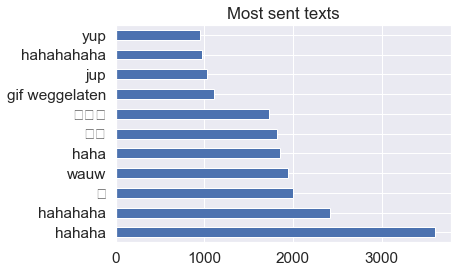

In [328]:
author_media_messages_value_counts = media_messages_df['text'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(11)
top_10_author_media_messages_value_counts.plot.barh(title='Most sent texts')

These are the most sent text. You can conclude that, despide the dicussions and fights over football, we laugh A LOT. We can  see the laughing emojis in there as well. The triple Ha's have been send way more than 3000 times. These are one word, 6 letter texts. Let's take a further look at the lenght of these messages.

_While working on this project, eventually, the emojis weren't showing up anymore, they were laughing with tears emojis. It was probably because I changed a certain setting in the code while showing a matrix_

<AxesSubplot:title={'center':'Guys who respond on the amount of words in messages'}, ylabel='responder'>

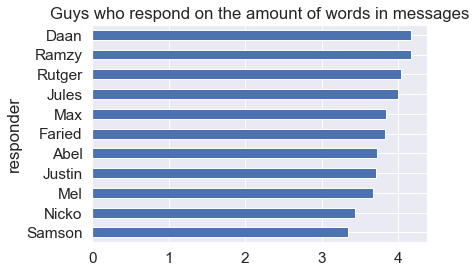

In [335]:
respond_to_words = df.groupby("responder")["words"].mean().sort_values(ascending=True).plot.barh(title='Guys who respond on the amount of words in messages')
respond_to_words

Most messages sent were 1 word messages. So if we see this graph, Samson will tend to respond earlier to those kind of messages than Daan or Ramzy. They probably like well-founded texts more (haha).

<AxesSubplot:title={'center':'Waiting time for the next person to respond'}, ylabel='wait_time'>

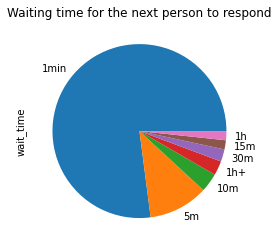

In [154]:
df['wait_time'].value_counts().plot(kind='pie', title='Waiting time for the next person to respond')

So to back up my previous statement during feature engineering about chosing to look at the 10 messages before, a lot of messages were send a minute after each other. This could be from the same person, but more than 45% of all messages couldn't be from the same person. Add the 5 minutes on there and you have a conversation.

Let's now look at what time of the day the messages were send. 

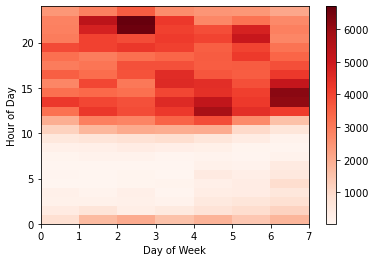

In [110]:
# https://towardsdatascience.com/analysing-whatsapp-group-messages-using-python-a17306d3ccad

# Create new fields to use in heatmap
df_sub = df
df_sub['day_of_week'] = df['date_time'].dt.dayofweek + 1
df_sub['hour_of_day'] = df['date_time'].dt.hour

# Create new Dataframe containing data counts
heatmap_data = df_sub.groupby(['hour_of_day', 'day_of_week']).size()
heatmap_data = heatmap_data.unstack()

# Create heatmap
plt.pcolor(heatmap_data, cmap='Reds')
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.colorbar()
plt.show()

I very much like that my thoughts on the peak moments are confirmed. Especially Wednesday evenings during Champions League football are very dark. Also the Sunday afternoons, probably giving each other a recap of the night before and talking football. You can slightly see an increase of messages in the run up to the weekend. Besides you see that on Thursday till Sunday, the nights are also a little darker. Because we probably can't find each other in the bars or so. I think it is a good descision to have 6 different periods of the day. The combination of the different periods with days can really say a lot about the discussions in the group.

Now let's look at who's most likely to respond on the different periods of the day.

In [111]:
# Grouping by period and responders and then counting, normalizing and make it a better df
res = df.groupby("name")["period"].value_counts(normalize=True)
res = res.unstack()
res

period,Early Morning,Evening,Late Night,Morning,Night,Noon
name,,,,,,
Abel,0.019558,0.285347,0.072908,0.063137,0.286812,0.272237
Daan,0.009301,0.267378,0.057233,0.092454,0.263905,0.309729
Faried,0.006175,0.273050,0.034981,0.101138,0.249074,0.335582
Jules,0.025928,0.275022,0.036674,0.095214,0.281707,0.285455
Justin,0.021325,0.241996,0.092773,0.061794,0.315299,0.266812
Max,0.010913,0.272235,0.050493,0.088353,0.301364,0.276642
Mel,0.016039,0.257726,0.048194,0.101330,0.254826,0.321884
Nicko,0.036006,0.180989,0.242919,0.059530,0.290927,0.189630
Ramzy,0.010318,0.281281,0.037576,0.114653,0.238700,0.317471


There were a lot of differences between the amount of messages between the guys. Nicko, for example, had only 3000 messages. You can't really compare that with the almost 100.000 of Faried. Nicko works a lot, he's chef in a restaurant. So he mostly responds after his working hours to see if people are going out. And you can see that in the graph, he tend to have a higher share during late night's and early mornings. So he's probably more likely to respond in those hours, and less likely during the others.
This next graph takes the averages of each person during each period.

<AxesSubplot:title={'center':'Guys who are most active during certain periods'}, xlabel='period'>

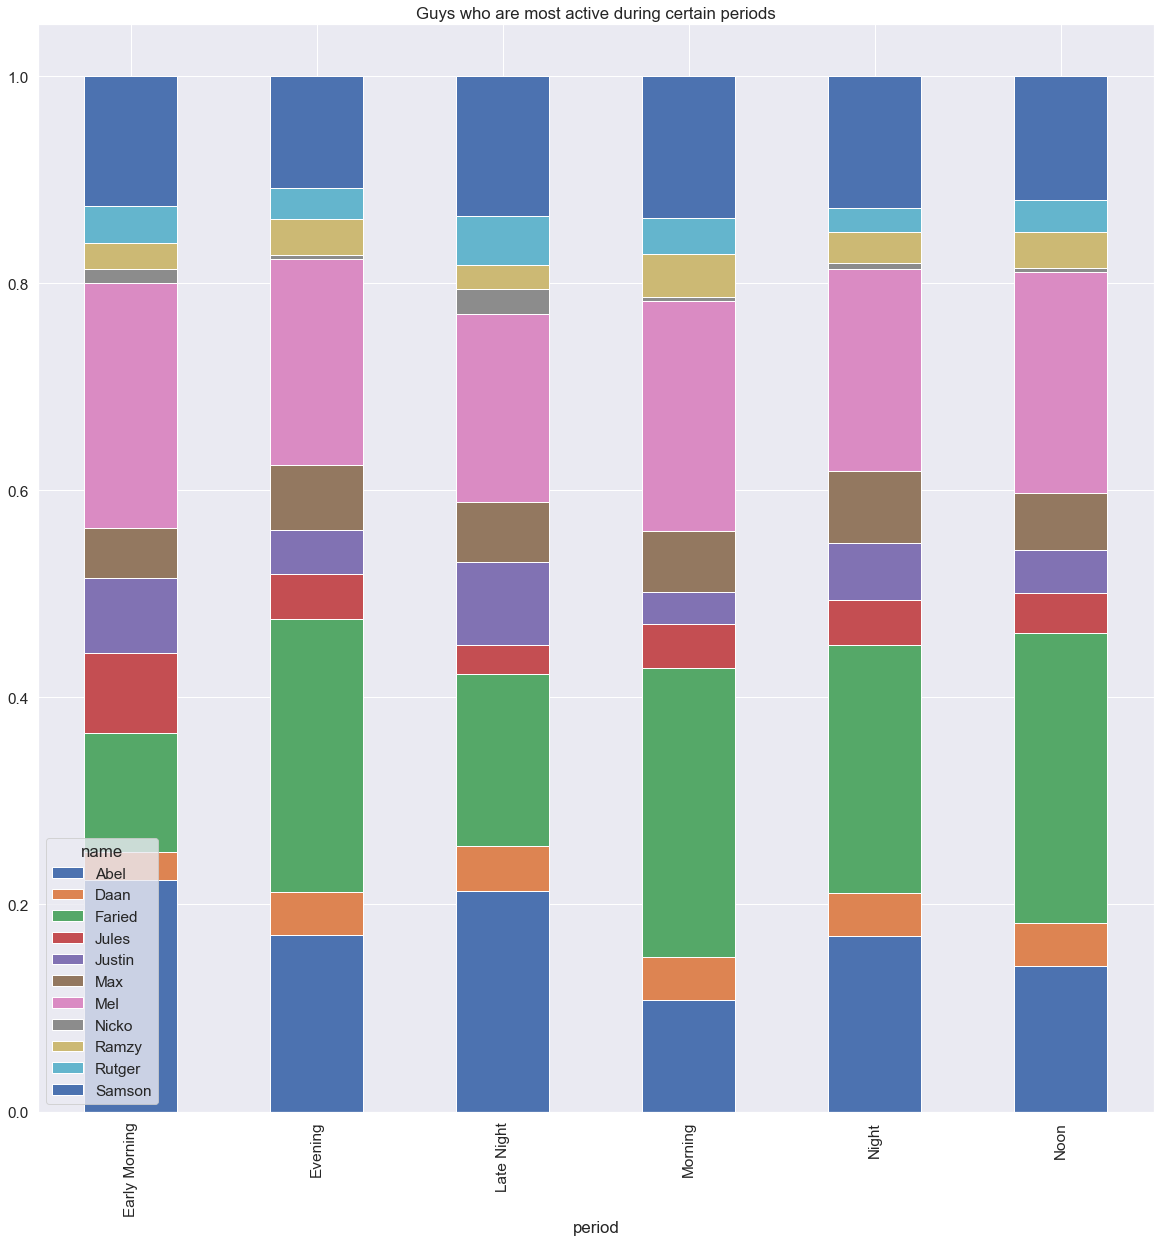

In [337]:
res = df.groupby("period")["name"].value_counts(normalize=True).unstack()
res = res.plot(title='Guys who are most active during certain periods', kind='bar',stacked=True, figsize=(20, 20))#.update_layout(barmode="relative")#.update_yaxes(range=[0,100])
res

Other insights:
- Justin tends to have a bigger share during late nights, compared to other periods.
- Abel isn't likely to respond in the mornings, but will be more likely to text in the night.
- Daan responds pretty evenly during all periods of the day.
- Jules is very active in the early mornings.

So the next think what's interesting to take a look at, is having insights of who will be more likely to respond to whom. Therefor we need to have a dataframe with all "names" and "responders". 

In [113]:
res = df.groupby("responder")["name"].value_counts(normalize=True).unstack()
res

name,Abel,Daan,Faried,Jules,Justin,Max,Mel,Nicko,Ramzy,Rutger,Samson
responder,,,,,,,,,,,
Abel,0.479546,0.025633,0.139807,0.026203,0.043139,0.028808,0.142804,0.003827,0.023678,0.016415,0.070140
Daan,0.101197,0.345570,0.194643,0.022881,0.038507,0.039685,0.147517,0.004155,0.026973,0.025051,0.053823
Faried,0.087122,0.031156,0.532803,0.024278,0.029198,0.043446,0.144213,0.002771,0.025041,0.017220,0.062754
Jules,0.103711,0.021554,0.146320,0.357928,0.047920,0.045296,0.163001,0.005186,0.018181,0.013308,0.077596
Justin,0.147805,0.037088,0.159640,0.041069,0.266158,0.038397,0.160349,0.009272,0.032015,0.022253,0.085956
Max,0.074663,0.028455,0.178663,0.027868,0.027322,0.375666,0.151173,0.005204,0.024846,0.008520,0.097620
Mel,0.110497,0.029645,0.183166,0.032041,0.038787,0.045054,0.419684,0.003455,0.026379,0.019847,0.091444
Nicko,0.120979,0.031205,0.120499,0.045127,0.067211,0.071051,0.133461,0.296687,0.031205,0.010082,0.072492
Ramzy,0.104797,0.036498,0.183645,0.026180,0.047509,0.048048,0.161007,0.004158,0.279741,0.022407,0.086009


The first time I saw the matrix of who responds most to whom, I was shocked, because I totally forgot about the double texts. most of the times people will send two messages after each other. Or sometimes when people tell stories, they send multiple messages after each other. The question that I asked in the beginning about who will respond to the message, doesn't really fit to the dataset anymore. In reality it is more like: who will send the message below this one? But I will keep the question the same, because it sounds better and you basically can respond to your own message.

<AxesSubplot:title={'center':'Who responds most to whom?'}, xlabel='name'>

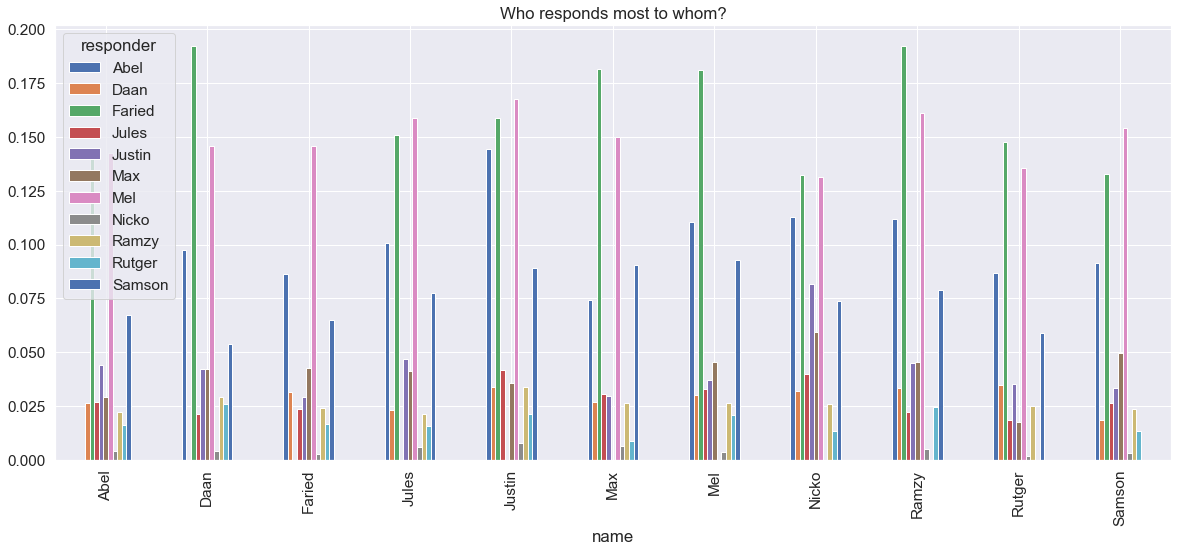

In [340]:
import pandas as pd
from sklearn import preprocessing

res = df.groupby("name")["responder"].value_counts(normalize=True).unstack()

# Take out all double texts
res.at['Abel', 'Abel'] = 0
res.at['Daan', 'Daan'] = 0
res.at['Faried', 'Faried'] = 0
res.at['Jules', 'Jules'] = 0
res.at['Justin', 'Justin'] = 0
res.at['Max', 'Max'] = 0
res.at['Mel', 'Mel'] = 0
res.at['Nicko', 'Nicko'] = 0
res.at['Ramzy', 'Ramzy'] = 0
res.at['Rutger', 'Rutger'] = 0
res.at['Samson', 'Samson'] = 0

# Y = res.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(Y)
# res = pd.DataFrame(y_scaled)
# res.unstack(normalize=True)

res = res.plot(kind='bar', title='Who responds most to whom?', figsize=(20, 8))#.update_layout(barmode="relative")#.update_yaxes(range=[0,100])
res

So here we see a graph that is of much value. We can see who is more likely to respond to a message of a certain other person. You can see that Faried responds much to every guy, but there are differences in his behaviour. Relatively speaking, he tend to have a high stake on responding to Daan's messages than others. Faried has the highest odds to respond on everyone but Samson. There, Mel has responded more. Because of those differences, I think this definately will influence the model.

Now let's focus a  bit more on the double texts. We should know the avarage double texting of the group, so we can take in that information to the evaluation and our predictions.

In [345]:
res = df.groupby("name")["responder"].value_counts().unstack()
# We create a new column to know the total of messages of each person, so we could calculate the number of double texts
res.loc[:,'Total'] = res.sum(axis=0)

res

responder,Abel,Daan,Faried,Jules,Justin,Max,Mel,Nicko,Ramzy,Rutger,Samson,Total
name,,,,,,,,,,,,
Abel,29447,1632,8677,1660,2710,1779,8763,252,1361,981,4144,61406
Daan,1574,5573,3103,345,680,678,2351,65,474,416,868,16127
Faried,8585,3139,53065,2342,2927,4257,14526,251,2385,1651,6469,99596
Jules,1609,369,2418,5729,753,664,2541,94,340,248,1241,16006
Justin,2649,621,2908,767,4880,651,3076,140,617,394,1632,18335
Max,1769,640,4327,725,704,8951,3573,148,624,211,2154,23827
Mel,8769,2379,14363,2609,2940,3602,33283,278,2091,1639,7352,79305
Nicko,235,67,276,83,170,124,274,618,54,28,154,2083
Ramzy,1454,435,2494,291,587,592,2092,65,3633,319,1025,12987


In [346]:
# Print out the percentage of every name in the chat.
for i in df['name'].unique():
    print("\n" + i + "'s percentage of double texts is:")
    print((res[i][i] / res['Total'][i] * 100).astype(int))


Faried's percentage of double texts is:
53

Justin's percentage of double texts is:
26

Daan's percentage of double texts is:
34

Abel's percentage of double texts is:
47

Mel's percentage of double texts is:
41

Ramzy's percentage of double texts is:
27

Rutger's percentage of double texts is:
43

Samson's percentage of double texts is:
45

Nicko's percentage of double texts is:
29

Jules's percentage of double texts is:
35

Max's percentage of double texts is:
37


In [223]:
print("The average double texts percentage of the group is")
print((53+26+34+47+41+27+43+45+29+35+37)/11)

The average double texts percentage of the group is
37.90909090909091


It's nice to see that some people double text way more than others. Now we also have a explanation on how Faried reached almost 100.000 text. I think almost 38% is still high, but it's way lower than half of the times. With good feature modeling it must be manageable to have a better score than that.

In [347]:
total_emojis_list = list([a for b in df.emojis for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emojis', 'count'])
emoji_df = emoji_df.head(15)

import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emojis',
             title='Emoji Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

I wanted to show the use of emojis in the group chat. These are only the top 15 emojis, but the laughing with tears is dominating. Even if I'd show all the emojis it would still be more than 50%!

## Part IV: Predictive Model
#### Random Forest.
Now we're entering the good part of this notebook. We're going to work with a model. I'm chosing Random Forest as my predictive model. It is a so called supervised learning algorithm that can be used for classification and regression. The model is pretty easy to work with. Random Forest is a kind of descision tree, but instead of one tree, it creates multiple trees and keep score of all outcomes. At the end they evaluate the scores and predict the outcome (Naviani, 2018). 

We'll be using Random Forest as a classification model, since we want to classify the responder. I tried the classifier models KNN and Naive Bayes, but Random Forest had the highest score, so I just went with that one and train it.

Random Forest advantages (Anurag, 2018)

- Random forest algorithm can be used for both classifications and regression task.
- It provides higher accuracy through cross validation.
- Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
- If there are more trees, it won’t allow over-fitting trees in the model.
- It has the power to handle a large data set with higher dimensionality

#### Getting the dummies
We create dummies, because the model can only take numerical data. Most of our features were alphabetical classified and we need to transform this into numbers. With dummies, pandas creates a column for every value that is in the existing column. The column of the name of the value will return the number 1 in that row. The other columns will return a 0. So a column with four unique values will instead of one column, have 4 columns with the number 1 in one of them.

In [260]:
df_dum = pd.get_dummies(df, columns=['name', 'before_1mes', 'before_2mes', 'before_3mes', 'before_4mes', 'before_5mes', 'before_6mes', 'before_7mes', 'before_8mes', 'before_9mes', 'before_10mes',  'day', 'wait_time', 'period', 'season'])
df_dum=df_dum.fillna("")
df_dum.head()

,date_time,text,emojis,responder,words,characters,link,img,audio,emoji_count,...,month_07,month_08,month_09,month_10,month_11,month_12,season_Fall,season_Spring,season_Summer,season_Winter
0,2014-05-10 19:36:39,zemmeks,[],Faried,1,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-05-10 19:36:41,jajaja,[],Faried,1,6,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014-05-10 19:36:45,nieuwe iphone,[],Faried,2,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2014-05-10 19:36:48,zonder barst,[],Justin,2,12,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014-05-10 21:55:52,gaan mensen nog aus,[],Daan,4,19,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now the new numerical columns are replaced by the alphabatical columns we had. Instead of 26 columns, we now have 167. Let's check if they are all integers.

In [323]:
df_dum.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388370 entries, 0 to 388369
Data columns (total 167 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   date_time             object
 1   text                  object
 2   emojis                object
 3   responder             object
 4   words                 int32 
 5   characters            int32 
 6   link                  int32 
 7   img                   int32 
 8   audio                 int32 
 9   emoji_count           int64 
 10  name_Abel             uint8 
 11  name_Daan             uint8 
 12  name_Faried           uint8 
 13  name_Jules            uint8 
 14  name_Justin           uint8 
 15  name_Max              uint8 
 16  name_Mel              uint8 
 17  name_Nicko            uint8 
 18  name_Ramzy            uint8 
 19  name_Rutger           uint8 
 20  name_Samson           uint8 
 21  before_1mes_Abel      uint8 
 22  before_1mes_Daan      uint8 
 23  before_1mes_Faried    uint8 
 24 

### The Model: Random Forest

Now we're importing the actual libraries for the model.

In [276]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

Let's check the possible outcomes of our Y variable one more time. The Y variable is the responder of the message. There will be one empty cell, because that is the last row and wasn't known at the time. Now we know that the answer was Jules (he double texted).

In [298]:
df_dum['responder'].value_counts(normalize=True)

Faried    0.256446
Mel       0.204200
Abel      0.158112
Samson    0.121266
Max       0.061351
Justin    0.047210
Daan      0.041525
Jules     0.041213
Ramzy     0.033440
Rutger    0.029871
Nicko     0.005363
          0.000003
Name: responder, dtype: float64

In [300]:
df_dum['responder'].value_counts(normalize=True).median()

0.04436748461518655

You could say that the the chance of every guy in the chat is 100/11= 9% per guy. But, the number of messages of each person is changing this idea. So, the highest is Faried with 26% of the messages  and the lowest is Nicko with 0.005% of all messages. The chance that it's Nicko who will respond based on this, is very unlikely. Because the values are so wide apart, we also checked the median. That is the middle point of this set of numbers, there are an evenly number of values above as below the median.

Let's also not forget the double texters. That was 38%, the goal is at least to be above this number. Because I predict that it is rather easy for the model to recognize the double texters. My hopes are on doubling the chances of the highest bidder, Faried, 52%.

Now let's start with the algorithm!

In [261]:
# Assigning the X and y
X = df_dum.loc[:,'words':'season_Winter'] #This gets all the columns from Words to Season_Winter
y = df_dum['responder'] # Here we assign the Y variable.

# Now we have to create our test and training sets. The training set will be 70% of our data set.
# We put random state as 1 so we will have the same outcome when we try the model multiple times.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [262]:
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [290]:
rf.score(X_test, y_test)

0.46954364823922207

So we came down to a score of 47%. I think that is already pretty good based on the fact that we didn't do text mining.

In [264]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['leeg','Abel (act)', 'Daan (act)','Faried (act)','Jules (act)','Justin (act)','Max (act)','Mel (act)','Nicko (act)','Ramzy (act)','Rutger (act)','Samson (act)'],
                  columns = ['leeg','Abel (pred)', 'Daan (pred)','Faried (pred)','Jules (pred)','Justin (pred)','Max (pred)','Mel (pred)','Nicko (pred)','Ramzy (pred)','Rutger (pred)','Samson (pred)']) #label and make df
cm

,leeg,Abel (pred),Daan (pred),Faried (pred),Jules (pred),Justin (pred),Max (pred),Mel (pred),Nicko (pred),Ramzy (pred),Rutger (pred),Samson (pred)
leeg,0,0,0,1,0,0,0,0,0,0,0,0
Abel (act),0,10050,215,2980,281,273,342,2857,17,121,161,1035
Daan (act),0,648,1369,1258,55,91,142,888,8,42,69,246
Faried (act),0,2923,473,18663,385,284,846,4058,17,213,362,1613
Jules (act),0,690,47,1015,1495,67,151,907,4,41,55,322
Justin (act),0,1205,104,1259,156,914,145,1199,17,68,86,449
Max (act),0,667,102,1688,123,74,2494,1200,9,56,48,591
Mel (act),0,3189,404,5414,555,359,743,10807,20,228,350,1873
Nicko (act),0,136,8,134,24,29,30,141,86,6,5,37
Ramzy (act),0,646,68,1082,50,84,126,835,2,676,81,269


With the confusion matrix we can see clearly where the model struggled with guessing. And you can see that the guys with most messages, Mel and Faried, are overrepresented in the other columns.

I saw this other confusion matrix online that I really liked, so I copied the code. With that matrix we have a better view of the recall of all predictions.

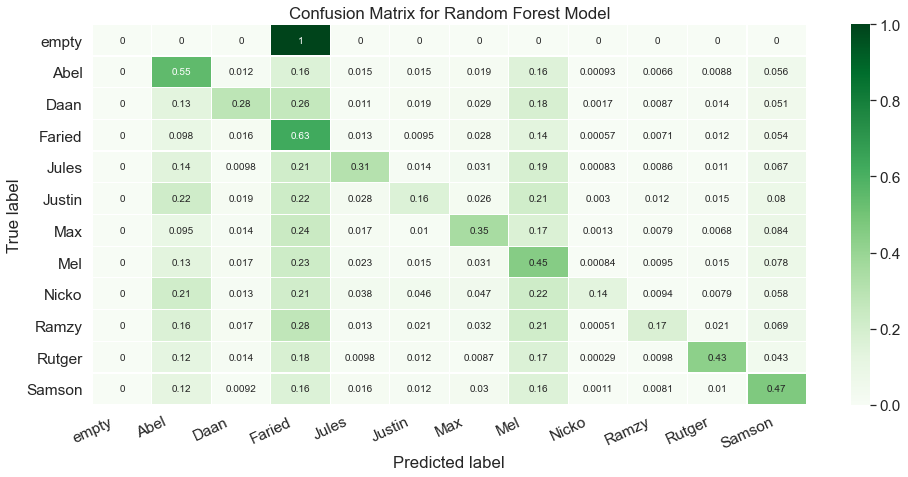

In [275]:
# https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['empty','Abel', 'Daan','Faried','Jules','Justin','Max','Mel','Nicko','Ramzy','Rutger','Samson']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Part V: Evaluation

So to sum up everything. First we implemented the data set, then we cleaned the data and added new features. After that we analysed the data, in reality this happened during we added new features to get new insights. We chose Random Forest as our algorithm that would classify our outcomes. Now we're going to evaluate the results.

In [326]:
# Let's print the classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
        Abel       0.45      0.55      0.50     18332
        Daan       0.46      0.28      0.35      4816
      Faried       0.51      0.63      0.56     29837
       Jules       0.44      0.31      0.37      4794
      Justin       0.38      0.16      0.23      5602
         Max       0.46      0.35      0.40      7052
         Mel       0.42      0.45      0.44     23942
       Nicko       0.44      0.14      0.21       636
       Ramzy       0.42      0.17      0.25      3919
      Rutger       0.52      0.43      0.47      3454
      Samson       0.50      0.47      0.49     14126

    accuracy                           0.47    116511
   macro avg       0.42      0.33      0.35    116511
weighted avg       0.46      0.47      0.46    116511



The model works best for guys with a high support and a high percentage of double messages, such as Faried (53%), Abel (47%) and Samson (45%). Justin, for example, double texts way less (26%) and you can really see a low on his recall. Most times when I added features it would only feed the ones with a big support. It was killing the ones with a lower support like Nicko and Rutger.

Nicko, Ramzy and Justin were very hard to predict. They have a very low recall, so they were confused a lot with false negatives. If you look at the confusion matrix, they all were confused a lot with the 3 guys with the most messages: Faried, Mel and Abel. They have such a high support so the model can distinguish them poorly.

I like it that Rutger has such a high score. Probably because most features were really set for his type of behaviour. He text mostly in summer, responds to certain people and short messages.

Samson seem to be predicted very good. He had a good support, but not as high as the top 3 earlier mentioned. He probably has his own style of texting that the system could distinguish him from the top 3 support guys. They probably has so much support that they attract most false positives already.

Overall, I think my score of 47% accuracy is pretty good. As I said earlier, I wanted to have a score above 50%. But seeing the results and the effect the support has on the predictions. I think I should be very happy with my 47%. Given the fact that I didn't implement some kind of text mining into my model.

### Citations

Anurag. (2018, August 17). Random Forest Analysis in ML and when to use it. NewGenApps. https://www.newgenapps.com/blog/random-forest-analysis-in-ml-and-when-to-use-it/

Navlani, A. (2018, May 16). Understanding Random Forests Classifiers in Python. Datacamp. https://www.datacamp.com/community/tutorials/random-forests-classifier-python

## Extra! Adding text mining
I really wanted to add text mining. But due to a stupid bug in my code, I lost a lot of time at the end. Here is how far I came. I just really wanted to still show the progress. I know how the concept works to add the document feature matrix on the dummy model. But at the end it wasn't cutting it.

In [306]:
mask = (df['date_time'] > '08-01-2020')
dummy = df.loc[mask]
dummy = dummy.reset_index()
dummy

,index,date_time,name,text,emojis,responder,words,characters,link,img,...,before_4mes,before_5mes,before_6mes,before_7mes,before_8mes,before_9mes,before_10mes,emoji_count,wait_time,month
0,365968,2020-08-01 00:12:11,Nicko,tot t eind,[],Faried,3,10,0,0,...,Nicko,Abel,Rutger,Rutger,Abel,Abel,Rutger,0,1h+,08
1,365969,2020-08-01 09:31:32,Faried,shiittt hahahaha,[],Faried,2,16,0,0,...,Abel,Nicko,Abel,Rutger,Rutger,Abel,Abel,0,1min,08
2,365970,2020-08-01 09:31:40,Faried,ey voor de hercu boys,[],Faried,5,21,0,0,...,Abel,Abel,Nicko,Abel,Rutger,Rutger,Abel,0,1min,08
3,365971,2020-08-01 09:31:55,Faried,zeker gevlogen vannacht,[],Faried,3,23,0,0,...,Justin,Abel,Abel,Nicko,Abel,Rutger,Rutger,0,1min,08
4,365972,2020-08-01 09:32:06,Faried,was bij scott en de boy was panchi,[],Faried,8,34,0,0,...,Nicko,Justin,Abel,Abel,Nicko,Abel,Rutger,0,1min,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22397,388365,2021-01-12 13:48:09,Faried,afbeelding weggelaten,[],Faried,2,21,0,1,...,Ramzy,Faried,Ramzy,Faried,Ramzy,Ramzy,Daan,0,1min,01
22398,388366,2021-01-12 13:48:25,Faried,enge enge klappers,[],Max,3,18,0,0,...,Ramzy,Ramzy,Faried,Ramzy,Faried,Ramzy,Ramzy,0,5m,01
22399,388367,2021-01-12 13:49:47,Max,3andek he,[],Max,2,9,0,0,...,Faried,Ramzy,Ramzy,Faried,Ramzy,Faried,Ramzy,0,1min,01
22400,388368,2021-01-12 13:50:01,Max,altijd als ik mocros belachelijk maakte bij go...,[],Max,8,51,0,0,...,Daan,Faried,Ramzy,Ramzy,Faried,Ramzy,Faried,0,1min,01


In [307]:
df_dum1 = pd.get_dummies(dummy, columns=['name', 'before_1mes', 'before_2mes', 'before_3mes', 'before_4mes', 'before_5mes', 'before_6mes', 'before_7mes', 'before_8mes', 'before_9mes', 'before_10mes',  'day', 'wait_time', 'period', 'season'])
df_dum1=df_dum1.fillna("")

In [308]:
from sklearn.feature_extraction.text import CountVectorizer #The CountVectorizer object
from stop_words import get_stop_words

stop_words = get_stop_words('dutch')
text = df_dum1['text'].values.astype('U') #Taking the text from the df. We need to convert it to Unicode
vect = CountVectorizer(stop_words=stop_words) #Create the CV object, with English stop words
vect = vect.fit(text) #We fit the model with the words from the review text
vect
feature_names = vect.get_feature_names() #Get the words from the vocabulary
#feature_names
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[500:520]}")

There are 11680 words in the vocabulary. A selection: ['958728', '95e', '96', '961398', '97', '9874040027', '987404002712400', '99', '9ctjn_wfxei', '9cybma26sgsww', '9u', '_2ur7wurtn4', '_5uokqxzcoa', '_6cu5mba', '_etgaiclrwcrwpka_jxmhq', 'a054b9fd', 'a05f7b46', 'a083a8e1', 'a086800e', 'a0b4cf7e']


In [309]:
docu_feat = vect.transform(text) #The transform method from the CountVectorizer object creates the matrix
print(docu_feat[0:50,0:50]) #Let's print a little part of the matrix: the first 50 words & documents

In [310]:
#Make a regular matrix out of docu_feat, make it into a DataFrame and concatenate it along the columns
rev_words = pd.concat([dummy, pd.DataFrame(docu_feat.toarray())], axis=1)
rev_words.head(10)

,index,date_time,name,text,emojis,responder,words,characters,link,img,...,11670,11671,11672,11673,11674,11675,11676,11677,11678,11679
0,365968,2020-08-01 00:12:11,Nicko,tot t eind,[],Faried,3,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,365969,2020-08-01 09:31:32,Faried,shiittt hahahaha,[],Faried,2,16,0,0,...,0,0,0,0,0,0,0,0,0,0
2,365970,2020-08-01 09:31:40,Faried,ey voor de hercu boys,[],Faried,5,21,0,0,...,0,0,0,0,0,0,0,0,0,0
3,365971,2020-08-01 09:31:55,Faried,zeker gevlogen vannacht,[],Faried,3,23,0,0,...,0,0,0,0,0,0,0,0,0,0
4,365972,2020-08-01 09:32:06,Faried,was bij scott en de boy was panchi,[],Faried,8,34,0,0,...,0,0,0,0,0,0,0,0,0,0
5,365973,2020-08-01 09:32:18,Faried,hij vroeg kan je koda aub uitlaten,[],Faried,7,34,0,0,...,0,0,0,0,0,0,0,0,0,0
6,365974,2020-08-01 09:32:22,Faried,pshhh,[],Faried,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365975,2020-08-01 09:32:29,Faried,koda heeft mij uitgelaten,[],Max,4,25,0,0,...,0,0,0,0,0,0,0,0,0,0
8,365976,2020-08-01 10:43:52,Max,biggie daggoe,[],Mel,2,13,0,0,...,0,0,0,0,0,0,0,0,0,0
9,365977,2020-08-01 11:50:14,Mel,dinsdag uitshirt uuttie,[],Abel,3,23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:

print('", "'.join(str(x) for x in list1))
# for i in list1:
#     print(i)

index", "date_time", "text", "emojis", "responder", "words", "characters", "link", "img", "audio", "emoji_count", "month", "name_Abel", "name_Daan", "name_Faried", "name_Jules", "name_Justin", "name_Max", "name_Mel", "name_Nicko", "name_Ramzy", "name_Rutger", "name_Samson", "before_1mes_Abel", "before_1mes_Daan", "before_1mes_Faried", "before_1mes_Jules", "before_1mes_Justin", "before_1mes_Max", "before_1mes_Mel", "before_1mes_Nicko", "before_1mes_Ramzy", "before_1mes_Rutger", "before_1mes_Samson", "before_2mes_Abel", "before_2mes_Daan", "before_2mes_Faried", "before_2mes_Jules", "before_2mes_Justin", "before_2mes_Max", "before_2mes_Mel", "before_2mes_Nicko", "before_2mes_Ramzy", "before_2mes_Rutger", "before_2mes_Samson", "before_3mes_Abel", "before_3mes_Daan", "before_3mes_Faried", "before_3mes_Jules", "before_3mes_Justin", "before_3mes_Max", "before_3mes_Mel", "before_3mes_Nicko", "before_3mes_Ramzy", "before_3mes_Rutger", "before_3mes_Samson", "before_4mes_Abel", "before_4mes_Daan"

In [321]:
rev_words.columns = ["index", "date_time", "text", "emojis", "responder", "words", "characters", "link", "img", "audio", "emoji_count", "month", "name_Abel", "name_Daan", "name_Faried", "name_Jules", "name_Justin", "name_Max", "name_Mel", "name_Nicko", "name_Ramzy", "name_Rutger", "name_Samson", "before_1mes_Abel", "before_1mes_Daan", "before_1mes_Faried", "before_1mes_Jules", "before_1mes_Justin", "before_1mes_Max", "before_1mes_Mel", "before_1mes_Nicko", "before_1mes_Ramzy", "before_1mes_Rutger", "before_1mes_Samson", "before_2mes_Abel", "before_2mes_Daan", "before_2mes_Faried", "before_2mes_Jules", "before_2mes_Justin", "before_2mes_Max", "before_2mes_Mel", "before_2mes_Nicko", "before_2mes_Ramzy", "before_2mes_Rutger", "before_2mes_Samson", "before_3mes_Abel", "before_3mes_Daan", "before_3mes_Faried", "before_3mes_Jules", "before_3mes_Justin", "before_3mes_Max", "before_3mes_Mel", "before_3mes_Nicko", "before_3mes_Ramzy", "before_3mes_Rutger", "before_3mes_Samson", "before_4mes_Abel", "before_4mes_Daan", "before_4mes_Faried", "before_4mes_Jules", "before_4mes_Justin", "before_4mes_Max", "before_4mes_Mel", "before_4mes_Nicko", "before_4mes_Ramzy", "before_4mes_Rutger", "before_4mes_Samson", "before_5mes_Abel", "before_5mes_Daan", "before_5mes_Faried", "before_5mes_Jules", "before_5mes_Justin", "before_5mes_Max", "before_5mes_Mel", "before_5mes_Nicko", "before_5mes_Ramzy", "before_5mes_Rutger", "before_5mes_Samson", "before_6mes_Abel", "before_6mes_Daan", "before_6mes_Faried", "before_6mes_Jules", "before_6mes_Justin", "before_6mes_Max", "before_6mes_Mel", "before_6mes_Nicko", "before_6mes_Ramzy", "before_6mes_Rutger", "before_6mes_Samson", "before_7mes_Abel", "before_7mes_Daan", "before_7mes_Faried", "before_7mes_Jules", "before_7mes_Justin", "before_7mes_Max", "before_7mes_Mel", "before_7mes_Nicko", "before_7mes_Ramzy", "before_7mes_Rutger", "before_7mes_Samson", "before_8mes_Abel", "before_8mes_Daan", "before_8mes_Faried", "before_8mes_Jules", "before_8mes_Justin", "before_8mes_Max", "before_8mes_Mel", "before_8mes_Nicko", "before_8mes_Ramzy", "before_8mes_Rutger", "before_8mes_Samson", "before_9mes_Abel", "before_9mes_Daan", "before_9mes_Faried", "before_9mes_Jules", "before_9mes_Justin", "before_9mes_Max", "before_9mes_Mel", "before_9mes_Nicko", "before_9mes_Ramzy", "before_9mes_Rutger", "before_9mes_Samson", "before_10mes_Abel", "before_10mes_Daan", "before_10mes_Faried", "before_10mes_Jules", "before_10mes_Justin", "before_10mes_Max", "before_10mes_Mel", "before_10mes_Nicko", "before_10mes_Ramzy", "before_10mes_Rutger", "before_10mes_Samson", "day_Friday", "day_Monday", "day_Saturday", "day_Sunday", "day_Thursday", "day_Tuesday", "day_Wednesday", "wait_time_10m", "wait_time_15m", "wait_time_1h", "wait_time_1h+", "wait_time_1min", "wait_time_30m", "wait_time_5m", "period_Early Morning", "period_Evening", "period_Late Night", "period_Morning", "period_Night", "period_Noon", "season_Fall", "season_Summer", "season_Winter"] + feature_names
rev_words.head()

ValueError: Length mismatch: Expected axis has 11707 elements, new values have 11836 elements

In [49]:
X = rev_words.loc[:,'words':'11679'] 
y = rev_words['responder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

KeyError: '11678'